___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EXPLORATORY DATA ANALYSIS (EDA)
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## 1. Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("darkgrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

## 2. Download the data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_m = pd.read_csv('ansur_male.csv', encoding='ISO-8859-1')
df_f = pd.read_csv('ansur_female.csv', encoding='ISO-8859-1')

In [3]:
df_m.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [4]:
df_m.shape

(4082, 108)

In [5]:
df_m.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [6]:
df_f.tail()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
1981,29501,285,1392,335,223,1297,252,196,368,299,312,477,72,306,282,136,1089,255,856,652,541,373,1457,290,1082,293,1258,779,732,382,36,60,19,210,746,103,259,328,262,514,456,1085,81,197,193,151,582,205,321,75,381,413,1048,615,373,390,462,535,486,61,423,121,369,391,1307,118,414,237,1036,354,145,865,840,555,1716,1687,1391,1119,660,155,749,446,136,872,1706,447,334,1043,265,370,1002,832,162,836,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand
1982,29502,262,1324,301,202,1204,236,181,378,294,287,468,66,309,311,145,1016,246,818,572,464,375,1390,291,1016,269,1151,732,647,331,36,65,23,274,770,101,245,319,261,514,440,985,81,196,183,160,570,186,296,61,347,377,974,650,400,411,433,483,457,58,383,130,359,399,1323,99,377,237,1051,318,142,881,794,525,1620,1613,1316,1043,616,157,721,422,131,838,1648,446,334,971,243,374,958,717,157,804,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand
1983,29503,260,1334,318,213,1259,234,183,363,332,299,460,70,317,311,139,1063,262,846,637,525,370,1412,285,1093,286,1166,793,609,326,39,62,18,204,739,97,249,338,288,530,459,1050,82,192,191,144,559,190,318,72,364,400,986,640,400,412,450,517,476,57,412,111,352,402,1318,116,392,259,1054,338,136,841,848,566,1740,1644,1337,1054,640,159,758,449,127,862,1590,444,335,982,254,351,970,762,159,774,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand
1984,29511,205,1293,302,199,1207,213,163,376,276,280,426,62,282,267,137,1051,225,786,582,480,370,1377,270,922,243,1137,763,575,310,35,62,21,222,738,91,226,306,258,430,425,995,74,177,176,149,558,186,280,59,369,411,971,640,383,418,432,491,445,58,400,119,326,380,1286,111,375,230,996,321,136,854,791,530,1628,1616,1288,1028,623,163,725,419,135,802,1525,450,298,837,208,335,952,632,146,769,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand
1985,920103,238,1346,308,210,1256,236,188,361,285,279,433,71,304,278,129,974,217,820,586,479,343,1401,272,902,219,1186,783,536,307,35,58,23,243,754,100,239,314,259,464,439,1053,78,187,177,148,561,189,310,78,33

In [7]:
df_f.shape

(1986, 108)

In [8]:
df_f.isnull().sum()

SubjectId                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [9]:
lst = []
for i in range(len(df_m.columns)):
    for j in range(len(df_f.columns)):
        if i == j and list(df_m.columns)[i] != list(df_f.columns)[i]:
            lst.append(i)
print(lst)

[0]


In [10]:
df_f = df_f.rename(columns={'SubjectId': 'subjectid'})

In [11]:
lst = []
for i in range(len(df_m.columns)):
    for j in range(len(df_f.columns)):
        if i == j and list(df_m.columns)[i] != list(df_f.columns)[i]:
            lst.append(i)
print(lst)

[]


In [12]:
df = df_m.append(df_f, ignore_index=True)
df2 = df_m.append(df_f, ignore_index=True)

In [13]:
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [14]:
df.shape

(6068, 108)

In [15]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

## 3. Explore the data

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [145]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,6068.000,20757.198,13159.391,10027.000,14841.750,20063.500,27234.500,920103.000
abdominalextensiondepthsitting,6068.000,246.469,37.400,155.000,219.000,242.000,271.000,451.000
acromialheight,6068.000,1406.161,79.091,1115.000,1350.000,1410.000,1462.000,1683.000
acromionradialelength,6068.000,327.374,20.720,249.000,313.000,328.000,341.250,393.000
anklecircumference,6068.000,224.891,16.052,156.000,214.000,225.000,235.000,293.000
axillaheight,6068.000,1299.609,72.022,1038.000,1249.000,1302.000,1349.000,1553.000
balloffootcircumference,6068.000,244.193,16.845,186.000,232.000,245.000,256.000,306.000
balloffootlength,6068.000,194.755,13.516,151.000,185.000,195.000,204.000,245.000
biacromialbreadth,6068.000,399.204,30.237,283.000,376.000,404.000,421.000,489.000
bicepscircumferenceflexed,6068.000,340.934,41.520,216.000,311.000,341.000,370.000,490.000


In [146]:
for col in df.columns:
    print("Column", col, "has", df[col].nunique(), "unique values")

Column subjectid has 6068 unique values
Column abdominalextensiondepthsitting has 218 unique values
Column acromialheight has 432 unique values
Column acromionradialelength has 133 unique values
Column anklecircumference has 112 unique values
Column axillaheight has 402 unique values
Column balloffootcircumference has 107 unique values
Column balloffootlength has 86 unique values
Column biacromialbreadth has 169 unique values
Column bicepscircumferenceflexed has 237 unique values
Column bicristalbreadth has 132 unique values
Column bideltoidbreadth has 244 unique values
Column bimalleolarbreadth has 37 unique values
Column bitragionchinarc has 107 unique values
Column bitragionsubmandibulararc has 125 unique values
Column bizygomaticbreadth has 50 unique values
Column buttockcircumference has 429 unique values
Column buttockdepth has 161 unique values
Column buttockheight has 322 unique values
Column buttockkneelength has 209 unique values
Column buttockpopliteallength has 185 unique v

In [38]:
def is_outlier(x, k):
    upper = np.quantile(x, 0.75)
    lower = np.quantile(x, 0.25)
    iqr = upper - lower
    a = upper + iqr * k
    b = lower - iqr * k
    if a > x.max():
        a = x.max()
    if b < x.min():
        b = x.min()
    print('-----',x.name,'-----')
    print('Upper Limit: ', a, '\n', 'Lower Limit: ', b, sep='')
    print('Number of outliers in the lower bound:', len(df[x<b]))
    print('Number of outliers in the upper bound:', len(df[x>a]))

### 3.1. Demographic Data

In [148]:
df.select_dtypes('object')

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,WritingPreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,NaN,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,NaN,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,NaN,Right hand
...,...,...,...,...,...,...,...,...,...
6063,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Mexican,Right hand
6064,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,Mexican,Right hand
6065,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,NaN,Right hand
6066,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,Mexican,Right hand


#### 3.1.1. Gender

In [16]:
df.Gender.value_counts()

Male      4082
Female    1986
Name: Gender, dtype: int64

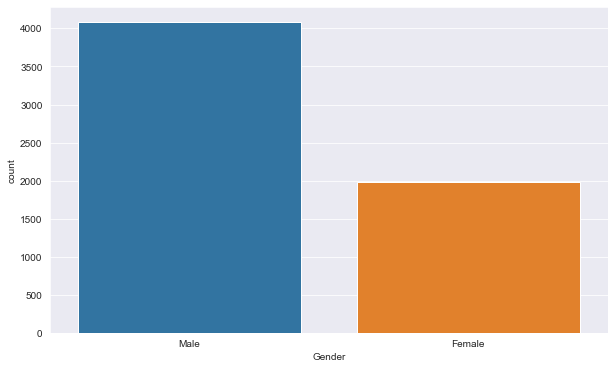

In [17]:
sns.countplot(df.Gender);

#### 3.1.2. Date

In [18]:
df.Date.value_counts()

27-Feb-12    45
5-Apr-12     44
21-Feb-12    43
28-Feb-12    43
5-Mar-12     43
6-Mar-12     41
2-Jun-11     41
26-May-11    40
3-Apr-12     40
26-Mar-12    40
23-Feb-12    39
13-Mar-12    39
29-Feb-12    39
15-Mar-11    39
27-Apr-11    39
30-Mar-11    39
1-Mar-12     38
8-Dec-10     38
20-Mar-12    37
28-May-11    37
24-Jan-12    36
21-Mar-12    36
7-Mar-12     36
11-Apr-11    36
2-Mar-12     36
21-Mar-11    36
25-Jan-12    35
18-Mar-11    35
16-Mar-12    34
24-Feb-12    34
28-Jan-12    33
27-May-11    33
25-Mar-11    33
30-Jan-11    33
15-Aug-11    33
25-Mar-12    33
8-Jun-11     33
26-Mar-11    32
16-Aug-11    32
8-Mar-12     32
7-Jun-11     32
19-Mar-12    32
27-Jan-12    31
8-Dec-11     31
19-Jan-12    31
31-Mar-11    31
7-Nov-11     31
17-Mar-11    31
20-Jan-11    31
12-Dec-11    31
5-Oct-11     30
31-Jan-12    30
3-Jun-11     30
2-Feb-12     30
23-Nov-10    30
7-Dec-11     30
24-Mar-12    30
7-Jul-11     30
14-Mar-11    29
14-Dec-11    29
5-Dec-11     29
6-Dec-11     29
15-Mar-1

In [19]:
df.drop('Date', axis=1, inplace=True)

#### 3.1.3. Installation

In [20]:
df.Installation.value_counts()

Camp Shelby       1160
Fort Bliss         963
Fort Gordon        669
Fort McCoy         452
Camp Atterbury     441
Fort Hood          439
Fort Huachuca      436
Fort Bragg         397
Fort Drum          391
Fort Lee           380
Fort Stewart       339
Fort Rucker          1
Name: Installation, dtype: int64

In [21]:
df.drop('Installation', axis=1, inplace=True)

#### 3.1.4. Component

In [22]:
df.Component.value_counts()

Regular Army           3140
Army National Guard    2708
Army Reserve            220
Name: Component, dtype: int64

In [23]:
df.drop('Component', axis=1, inplace=True)

#### 3.1.5. Branch

In [24]:
df.Branch.value_counts()

Combat Service Support    3174
Combat Arms               1582
Combat Support            1312
Name: Branch, dtype: int64

In [25]:
df.drop('Branch', axis=1, inplace=True)

#### 3.1.6. PrimaryMOS

In [26]:
df.PrimaryMOS.value_counts()

11B     671
88M     320
92A     288
91B     230
68W     222
92Y     211
42A     201
25U     196
31B     191
25B     176
12B     160
13B     139
35D     131
35M     128
74D     126
19D     123
92G     123
92F     119
25Q     113
35F      82
91D      73
25S      66
25L      62
11C      55
25A      53
19K      50
25N      49
12N      39
13D      39
11A      38
13F      38
91C      38
35G      36
92W      34
94F      33
90A      31
91J      30
91A      30
94E      29
89B      28
36B      27
91H      25
92S      24
21B      24
91L      23
35T      21
68A      20
88N      19
27D      19
11Z      19
68E      18
25W      18
92M      18
12C      17
12W      17
56M      17
15T      16
25P      15
13A      15
70B      15
91X      15
68J      15
35N      15
68K      14
35P      14
31E      14
13R      14
14J      14
66H      14
88Z      13
35L      13
88A      13
15W      13
15P      12
35X      12
25C      12
91E      12
13Z      11
351L     11
31A      11
14Z      10
12R      10
14T      10
14E 

In [27]:
df.drop('PrimaryMOS', axis=1, inplace=True)

#### 3.1.7. SubjectsBirthLocation

In [28]:
df['SubjectsBirthLocation'].value_counts()

California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Arizona                      84
Missouri                     84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas                       63
South Da

#### 3.1.8. Ethnicity

In [29]:
df.Ethnicity.value_counts(dropna=False)

NaN                                                   4647
Mexican                                                357
Puerto Rican                                           183
Caribbean Islander                                     124
Filipino                                                67
Cherokee                                                65
Korean                                                  53
Dominican                                               32
Chinese                                                 26
Japanese                                                22
Vietnamese                                              21
Colombian                                               17
Cuban                                                   17
Arab or Middle Eastern                                  17
Salvadoran                                              16
East/Asian Indian                                       13
Samoan                                                  

In [30]:
df.Ethnicity.isnull().sum() / len(df) * 100

76.5820698747528

In [31]:
df.drop('Ethnicity', axis=1, inplace=True)

#### 3.1.9. WritingPreference

In [32]:
df.WritingPreference.value_counts()

Right hand                     5350
Left hand                       656
Either hand (No preference)      62
Name: WritingPreference, dtype: int64

#### 3.1.10. subjectid

In [33]:
df.drop('subjectid', axis=1, inplace=True)

#### 3.1.11. Age

In [34]:
df.Age.value_counts()

21    383
22    372
23    354
24    336
20    320
26    311
25    311
28    278
27    272
19    246
31    233
29    227
30    215
33    156
32    154
41    147
42    141
40    141
38    135
37    127
39    127
35    126
34    116
36    115
18    112
44     94
43     85
45     75
46     58
47     56
48     50
50     40
49     39
51     31
53     23
52     17
54     13
56     12
55      9
58      5
57      4
17      2
Name: Age, dtype: int64

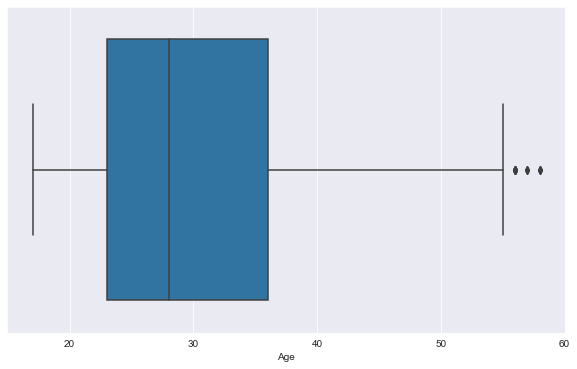

In [35]:
sns.boxplot(df.Age);

In [39]:
is_outlier(df.Age, 2)

----- Age -----
Upper Limit: 58
Lower Limit: 17
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0


In [40]:
df.Heightin.value_counts()

69    628
70    573
71    557
66    554
68    532
67    519
72    478
64    386
65    324
73    291
63    274
74    236
62    229
75    117
61    102
60     83
76     68
77     36
59     35
78     15
80      7
57      6
79      5
58      5
56      3
81      2
87      1
86      1
94      1
Name: Heightin, dtype: int64

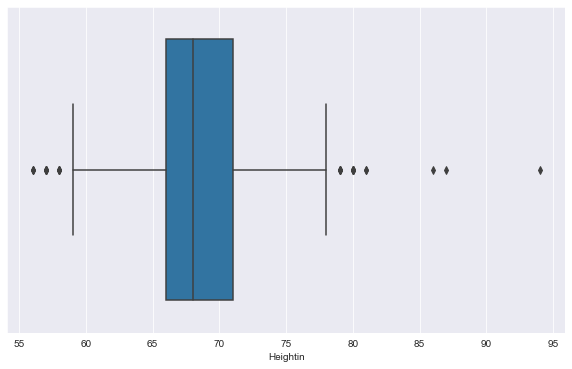

In [41]:
sns.boxplot(df.Heightin);

In [42]:
is_outlier(df.Heightin, 2)

----- Heightin -----
Upper Limit: 81.0
Lower Limit: 56.0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 3


In [43]:
# Since this is a subjective evaulation of height by the soldier himself/herself, I dropped this variable
df.drop('Heightin', axis=1, inplace=True)

In [44]:
df.Weightlbs.value_counts()

170    234
150    233
180    232
160    215
175    211
185    204
165    202
190    191
200    180
155    162
140    155
210    151
195    147
145    147
135    125
220    114
215    111
130    107
205     98
225     77
230     73
125     59
148     59
168     58
178     57
120     53
158     50
240     49
187     46
138     46
235     43
153     42
198     42
128     39
162     39
127     37
167     36
173     36
147     36
174     36
143     35
172     35
137     34
250     34
182     33
156     33
152     33
169     33
183     32
184     31
154     31
142     31
157     31
188     31
132     29
194     29
193     29
163     29
177     28
196     28
197     28
192     26
181     26
115     26
176     25
110     25
212     23
245     23
164     23
133     22
186     22
203     22
218     22
161     22
124     21
189     21
136     21
118     20
166     20
204     20
171     20
207     19
206     19
208     19
179     19
141     19
139     19
149     18
260     18
126     18
144     18

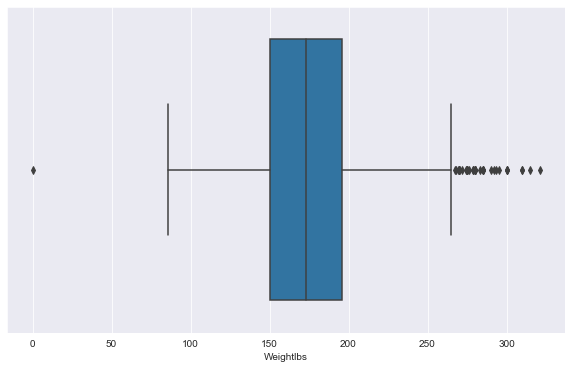

In [45]:
sns.boxplot(df.Weightlbs);

In [46]:
is_outlier(df.Weightlbs, 2.5)

----- Weightlbs -----
Upper Limit: 311.0
Lower Limit: 35.0
Number of outliers in the lower bound: 1
Number of outliers in the upper bound: 2


In [47]:
# Since this is a subjective evaulation of weight by the soldier himself/herself, I dropped this variable
df.drop('Weightlbs', axis=1, inplace=True)

In [48]:
df.SubjectNumericRace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [49]:
df.drop('SubjectNumericRace', axis=1, inplace=True)

In [50]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [51]:
df = df[df.DODRace <= 3]

In [52]:
df["DODRace"] = df.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic"
})

In [53]:
df.DODRace.value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

In [54]:
df.shape

(5769, 98)

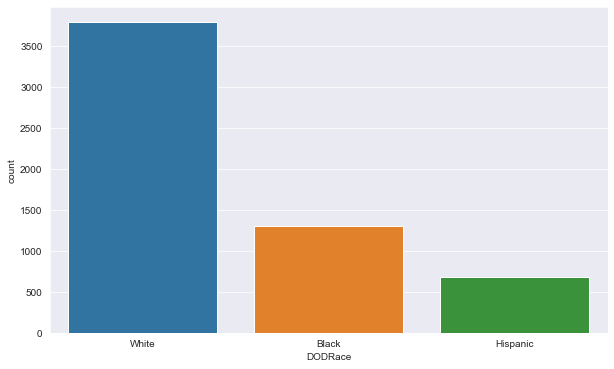

In [55]:
sns.countplot(df.DODRace);

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 6067
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null   

In [57]:
df.shape

(5769, 98)

In [58]:
df.isnull().sum()

abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
axillaheight                      0
balloffootcircumference           0
balloffootlength                  0
biacromialbreadth                 0
bicepscircumferenceflexed         0
bicristalbreadth                  0
bideltoidbreadth                  0
bimalleolarbreadth                0
bitragionchinarc                  0
bitragionsubmandibulararc         0
bizygomaticbreadth                0
buttockcircumference              0
buttockdepth                      0
buttockheight                     0
buttockkneelength                 0
buttockpopliteallength            0
calfcircumference                 0
cervicaleheight                   0
chestbreadth                      0
chestcircumference                0
chestdepth                        0
chestheight                       0
crotchheight                      0
crotchlengthomphalion       

In [59]:
df.head().T

,0,1,2,3,4
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356
bicristalbreadth,274,257,261,262,263


In [60]:
def is_outlier_total(x, k):
    for i in x.columns:
        upper = np.quantile(df[i], 0.75)
        lower = np.quantile(df[i], 0.25)
        iqr = upper - lower
        a = upper + iqr * k
        b = lower - iqr * k
        if a > df[i].max():
            a = df[i].max()
        if b < df[i].min():
            b = df[i].min()
        print('-----',df[i].name,'-----')
        print('Upper Limit: ', a, '\n', 'Lower Limit: ', b, sep='')
        print('Number of outliers in the lower bound:', len(df[df[i]<b]))
        print('Number of outliers in the upper bound:', len(df[df[i]>a]))
        
is_outlier_total(df, 2.5)

----- abdominalextensiondepthsitting -----
Upper Limit: 402.0
Lower Limit: 155
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 3
----- acromialheight -----
Upper Limit: 1683
Lower Limit: 1146
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0
----- acromionradialelength -----
Upper Limit: 393
Lower Limit: 249
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0
----- anklecircumference -----
Upper Limit: 287.5
Lower Limit: 161.5
Number of outliers in the lower bound: 1
Number of outliers in the upper bound: 2
----- axillaheight -----
Upper Limit: 1553
Lower Limit: 1062
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0
----- balloffootcircumference -----
Upper Limit: 306
Lower Limit: 186
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0
----- balloffootlength -----
Upper Limit: 245
Lower Limit: 151
Number of outliers in the lower bou

Number of outliers in the upper bound: 4
----- mentonsellionlength -----
Upper Limit: 152.5
Lower Limit: 91
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 1
----- neckcircumference -----
Upper Limit: 514
Lower Limit: 275
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0
----- neckcircumferencebase -----
Upper Limit: 545
Lower Limit: 302
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0
----- overheadfingertipreachsitting -----
Upper Limit: 1651
Lower Limit: 1111
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0
----- palmlength -----
Upper Limit: 140
Lower Limit: 92
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0
----- poplitealheight -----
Upper Limit: 525
Lower Limit: 305
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0
----- radialestylionlength -----
Upper Limit: 328
Lower Limit: 178.5
Num

TypeError: can't multiply sequence by non-int of type 'float'

In [191]:
# def remove_outlier(x, k, ind=0, df_new=None):
#     global df
#     if df_new is not None:
#         df = df_new
#     x = list(x)
#     i = x[ind]
#     upper = np.quantile(df[i], 0.75)
#     lower = np.quantile(df[i], 0.25)
#     iqr = upper - lower
#     a = upper + iqr * k
#     b = lower - iqr * k
#     if a > df[i].max():
#         a = df[i].max()
#     if b < df[i].min():
#         b = df[i].min()
#     df_new = df.loc[(df[i] <= a) & (df[i] >= b)]
#     ind += 1
#     if ind != len(x):
#         return remove_outlier(x, k, ind, df_new)
#     else:
#         return df_new

# remove_outlier(df.columns[:], 2.5)

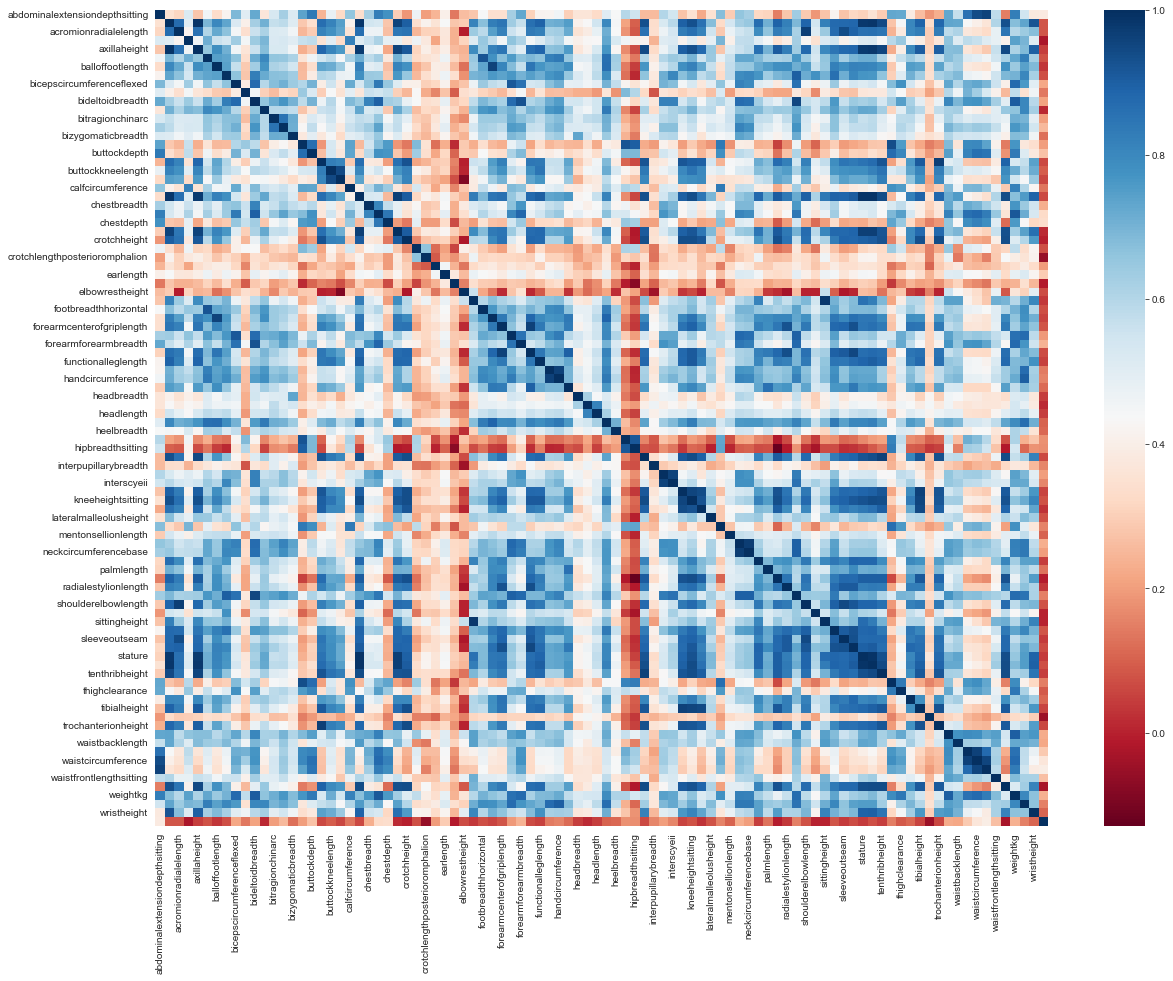

In [192]:
plt.figure(figsize=(20,15))
sns.heatmap(df.select_dtypes('int64').corr(), cmap='RdBu');

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [101]:
X = pd.get_dummies(data=df.drop("DODRace",axis=1), drop_first=True)
y = df['DODRace']

In [102]:
X.shape

(5769, 232)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [104]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [106]:
# If we want to examine feature importance in a model, we have to scale the data first.

In [107]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',
                                                                     max_iter=10000,random_state=42))]
pipe_log_model = Pipeline(steps=operations)

<IPython.core.display.Javascript object>

In [108]:
pipe_log_model.fit(X_train, y_train)
y_pred_log = pipe_log_model.predict(X_test)

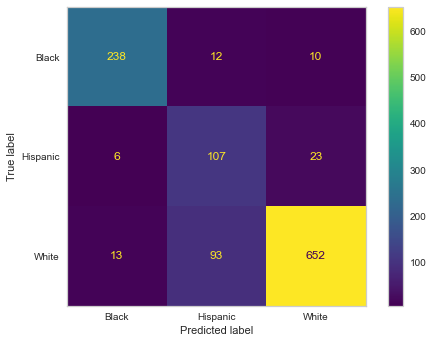

In [109]:
plot_confusion_matrix(pipe_log_model, X_test, y_test)
plt.grid(False);

In [110]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[238  12  10]
 [  6 107  23]
 [ 13  93 652]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   36   31]
 [  21  454   68]
 [  67  357 2610]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [111]:
# What we want to do here is to increase the scores for Hispanics. Therefore, we specifically look for their results.

In [112]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [113]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',
                                                                     max_iter=10000, random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores_log = pd.DataFrame(scores, index = range(1, 11))
df_scores_log.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic          0.604
test_precision_Hispanic   0.499
test_recall_Hispanic      0.770
dtype: float64

### Logistic Model GridsearchCV

In [114]:
# In this model, we want to increase correct predictions for Hispanics, therefore we choose to see recall values
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])

In [115]:
param_grid = {
    "log__C": [0.1, 0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

# liblinear works well with small datasets, so it is always to try it within gridsearch

In [116]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',
                                                                     max_iter=10000,random_state=42))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic, # we can optimize our value for only one variable in gridsearch
                              n_jobs=-1, cv=5)

<IPython.core.display.Javascript object>

In [117]:
log_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [118]:
log_model_grid.best_params_

{'log__C': 0.5, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [119]:
log_model_grid.best_score_
# this is the recall score for Hispanics

0.7751104315324499

In [120]:
y_pred_log_grid = log_model_grid.predict(X_test)

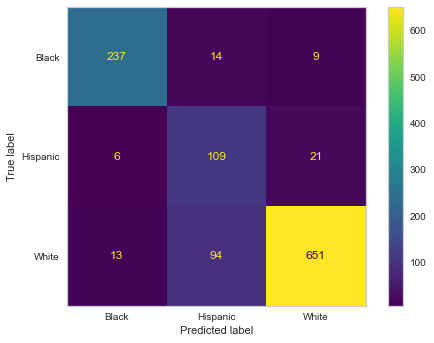

In [121]:
plot_confusion_matrix(log_model_grid, X_test, y_test)
plt.grid(False);

In [122]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[237  14   9]
 [  6 109  21]
 [ 13  94 651]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.80      0.62       136
       White       0.96      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.90      0.86      0.87      1154


Train_Set
[[ 965   38   35]
 [  24  449   70]
 [  74  372 2588]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1038
    Hispanic       0.52      0.83      0.64       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



In [123]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',
                                                                     C=1, max_iter=10000,random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores_log_grid = pd.DataFrame(scores, index = range(1, 11))
df_scores_log_grid.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic          0.604
test_precision_Hispanic   0.499
test_recall_Hispanic      0.770
dtype: float64

<IPython.core.display.Javascript object>

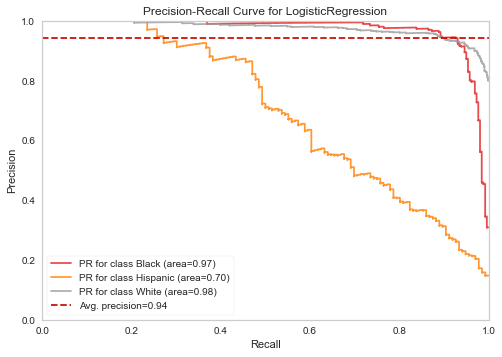

In [124]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',
                                                                     C=1, max_iter=10000,random_state=42))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [125]:
viz.score_

{'Black': 0.9719016028220795,
 'Hispanic': 0.7003257847836125,
 'White': 0.9758755625828639,
 'micro': 0.9418088316201313}

In [126]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model 

In [67]:
operations = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=42))]
pipe_svc_model = Pipeline(steps=operations)

<IPython.core.display.Javascript object>

In [68]:
pipe_svc_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svc', SVC(class_weight='balanced', random_state=42))])

In [70]:
y_pred_svc = pipe_svc_model.predict(X_test)

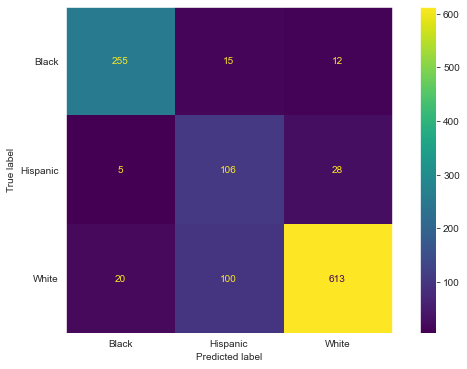

In [71]:
plot_confusion_matrix(pipe_svc_model, X_test, y_test)
plt.grid(False);

In [69]:
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[255  15  12]
 [  5 106  28]
 [ 20 100 613]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       282
    Hispanic       0.48      0.76      0.59       139
       White       0.94      0.84      0.88       733

    accuracy                           0.84      1154
   macro avg       0.78      0.83      0.79      1154
weighted avg       0.88      0.84      0.85      1154


Train_Set
[[ 940   35   41]
 [  23  450   67]
 [  53  395 2611]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1016
    Hispanic       0.51      0.83      0.63       540
       White       0.96      0.85      0.90      3059

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



In [75]:
operations = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=42))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores_svc = pd.DataFrame(scores, index = range(1, 11))
df_scores_svc.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic          0.579
test_precision_Hispanic   0.466
test_recall_Hispanic      0.767
dtype: float64

###  SVC Model GridsearchCV

In [76]:
param_grid = {
    'svc__C': [0.5,1,2,3],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

In [79]:
operations = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=42))]
model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

<IPython.core.display.Javascript object>

In [80]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [81]:
svm_model_grid.best_params_

{'svc__C': 3, 'svc__gamma': 'scale'}

In [82]:
svm_model_grid.best_score_

0.7722222222222221

In [83]:
y_pred_svm_grid = svm_model_grid.predict(X_test)

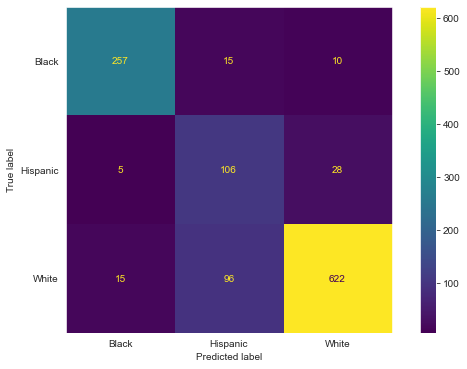

In [84]:
plot_confusion_matrix(svm_model_grid, X_test, y_test)
plt.grid(False);

In [85]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[257  15  10]
 [  5 106  28]
 [ 15  96 622]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       282
    Hispanic       0.49      0.76      0.60       139
       White       0.94      0.85      0.89       733

    accuracy                           0.85      1154
   macro avg       0.79      0.84      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 958   28   30]
 [  17  466   57]
 [  50  317 2692]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.94      1016
    Hispanic       0.57      0.86      0.69       540
       White       0.97      0.88      0.92      3059

    accuracy                           0.89      4615
   macro avg       0.83      0.90      0.85      4615
weighted avg       0.92      0.89      0.90      4615



In [86]:
operations = [("scaler", MinMaxScaler()), ("svc", SVC(C=3, class_weight="balanced",random_state=42))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores_svc = pd.DataFrame(scores, index = range(1, 11))
df_scores_svc.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic          0.613
test_precision_Hispanic   0.509
test_recall_Hispanic      0.774
dtype: float64

[CV 2/5] END ......svc__C=0.5, svc__gamma=scale;, score=0.787 total time=   8.1s
[CV 3/5] END .......svc__C=0.5, svc__gamma=auto;, score=0.676 total time=  11.7s
[CV 2/5] END ..........svc__C=0.5, svc__gamma=1;, score=0.565 total time=  10.4s
[CV 5/5] END ..........svc__C=0.5, svc__gamma=1;, score=0.583 total time=  10.3s
[CV 4/5] END ........svc__C=0.5, svc__gamma=0.1;, score=0.759 total time=   7.0s
[CV 3/5] END .......svc__C=0.5, svc__gamma=0.01;, score=0.750 total time=  10.3s
[CV 2/5] END ........svc__C=1, svc__gamma=scale;, score=0.787 total time=   6.5s
[CV 5/5] END ........svc__C=1, svc__gamma=scale;, score=0.731 total time=   6.7s
[CV 4/5] END .........svc__C=1, svc__gamma=auto;, score=0.704 total time=  10.4s
[CV 3/5] END ............svc__C=1, svc__gamma=1;, score=0.435 total time=  10.0s
[CV 2/5] END ..........svc__C=1, svc__gamma=0.1;, score=0.787 total time=   5.7s
[CV 1/5] END .........svc__C=1, svc__gamma=0.01;, score=0.741 total time=   9.0s
[CV 5/5] END .........svc__C

<IPython.core.display.Javascript object>

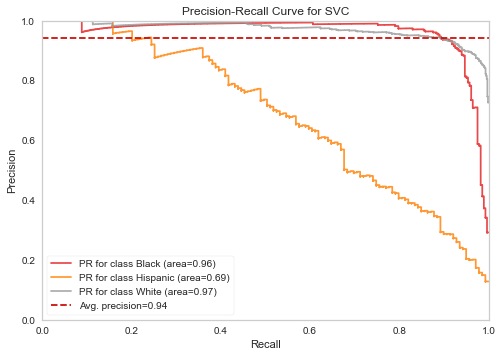

In [89]:
operations = [("scaler", MinMaxScaler()), ("svc", SVC(C=3, class_weight="balanced",random_state=42))]

model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [90]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [91]:
# Since tree-based models do not require the variables to be one-hot encoded, we can use label encoding which will
# diminish the number of features in the model.

In [92]:
from sklearn.preprocessing import OrdinalEncoder

In [94]:
X2 = df.drop("DODRace",axis=1)
y = df.DODRace

In [98]:
cat_features = X2.select_dtypes('object').columns

In [99]:
cat_features

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [100]:
enc = OrdinalEncoder()
X2[cat_features] = enc.fit_transform(X2[cat_features])
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1.000,91.000,41,2.000
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1.000,86.000,35,1.000
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,1.000,86.000,42,1.000
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1.000,133.000,31,2.000
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,1.000,90.000,21,2.000


In [127]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42, stratify=y)

### Vanilla RF Model


In [128]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)

In [129]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [131]:
y_pred_rf = rf_model.predict(X_test2)

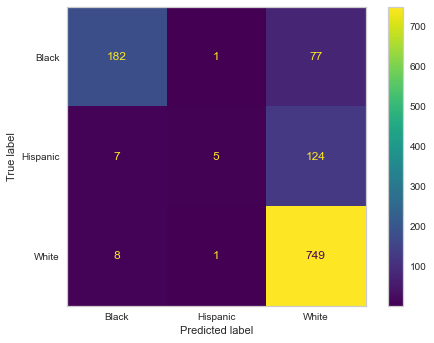

[CV 4/5] END log__C=0.1, log__penalty=l1, log__solver=liblinear;, score=0.541 total time=   1.4s
[CV 1/5] END log__C=0.1, log__penalty=l1, log__solver=lbfgs;, score=nan total time=   0.1s
[CV 3/5] END log__C=0.1, log__penalty=l1, log__solver=lbfgs;, score=nan total time=   0.1s
[CV 5/5] END log__C=0.1, log__penalty=l1, log__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END log__C=0.1, log__penalty=l2, log__solver=liblinear;, score=0.444 total time=   0.9s
[CV 5/5] END log__C=0.1, log__penalty=l2, log__solver=liblinear;, score=0.523 total time=   0.6s
[CV 3/5] END log__C=0.1, log__penalty=l2, log__solver=lbfgs;, score=0.789 total time=   1.7s
[CV 2/5] END log__C=0.5, log__penalty=l1, log__solver=liblinear;, score=0.537 total time=   4.5s
[CV 5/5] END log__C=0.5, log__penalty=l1, log__solver=liblinear;, score=0.587 total time=   4.8s
[CV 2/5] END log__C=1, log__penalty=l1, log__solver=liblinear;, score=0.546 total time=   6.9s
[CV 1/5] END log__C=1, log__penalty=l1, log__solver=lb

In [132]:
plot_confusion_matrix(rf_model, X_test2, y_test2)
plt.grid(False);

In [133]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[182   1  77]
 [  7   5 124]
 [  8   1 749]]
              precision    recall  f1-score   support

       Black       0.92      0.70      0.80       260
    Hispanic       0.71      0.04      0.07       136
       White       0.79      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.81      0.57      0.58      1154
weighted avg       0.81      0.81      0.76      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [134]:
model = RandomForestClassifier(class_weight="balanced", random_state=42)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.082
test_precision_Hispanic   0.725
test_recall_Hispanic      0.044
dtype: float64

### RF Model GridsearchCV

In [135]:
param_grid = {'n_estimators':[128,400,500],
             'max_depth':[10,12,14,16],
             'criterion': ['gini', 'entropy']} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]

In [137]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [138]:
rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 14, 16],
                         'n_estimators': [128, 400, 500]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [139]:
rf_grid_model.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 128}

In [140]:
rf_grid_model.best_score_

0.22458375806999661

In [142]:
y_pred_rf_grid = rf_grid_model.predict(X_test2)

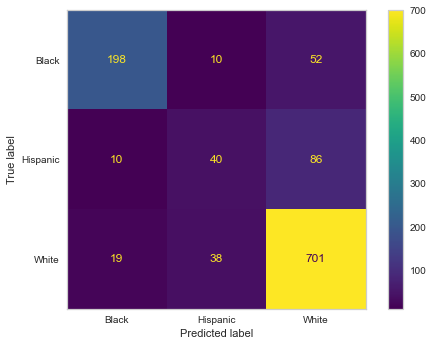

In [143]:
plot_confusion_matrix(rf_grid_model, X_test2, y_test2)
plt.grid(False);

In [144]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[198  10  52]
 [ 10  40  86]
 [ 19  38 701]]
              precision    recall  f1-score   support

       Black       0.87      0.76      0.81       260
    Hispanic       0.45      0.29      0.36       136
       White       0.84      0.92      0.88       758

    accuracy                           0.81      1154
   macro avg       0.72      0.66      0.68      1154
weighted avg       0.80      0.81      0.80      1154


Train_Set
[[1019    3   16]
 [   0  520   23]
 [   4   32 2998]]
              precision    recall  f1-score   support

       Black       1.00      0.98      0.99      1038
    Hispanic       0.94      0.96      0.95       543
       White       0.99      0.99      0.99      3034

    accuracy                           0.98      4615
   macro avg       0.97      0.98      0.97      4615
weighted avg       0.98      0.98      0.98      4615



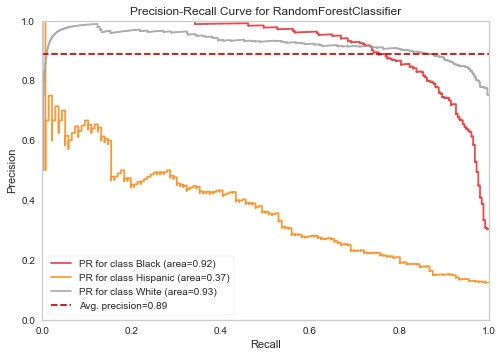

In [145]:
model = RandomForestClassifier(class_weight="balanced", random_state=42, max_depth=10, 
                               n_estimators = 128, criterion='gini')

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [146]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

[CV 4/5] END criterion=gini, max_depth=10, n_estimators=128;, score=0.211 total time=   2.7s
[CV 1/5] END criterion=gini, max_depth=10, n_estimators=400;, score=0.222 total time=   8.3s
[CV 5/5] END criterion=gini, max_depth=10, n_estimators=400;, score=0.239 total time=   8.2s
[CV 4/5] END criterion=gini, max_depth=10, n_estimators=500;, score=0.211 total time=  10.2s
[CV 1/5] END criterion=gini, max_depth=12, n_estimators=400;, score=0.120 total time=   9.1s
[CV 5/5] END criterion=gini, max_depth=12, n_estimators=400;, score=0.156 total time=   9.0s
[CV 4/5] END criterion=gini, max_depth=12, n_estimators=500;, score=0.092 total time=  11.3s
[CV 2/5] END criterion=gini, max_depth=14, n_estimators=400;, score=0.065 total time=  10.5s
[CV 1/5] END criterion=gini, max_depth=14, n_estimators=500;, score=0.065 total time=  11.9s
[CV 5/5] END criterion=gini, max_depth=14, n_estimators=500;, score=0.110 total time=  11.9s
[CV 4/5] END criterion=gini, max_depth=16, n_estimators=400;, score=0.

## 4. XGBoost

### Vanilla XGBoost Model

In [147]:
xgb_model = XGBClassifier(random_state=42)

In [148]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights

array([0.50703142, 0.50703142, 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [180]:
y_train2.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [181]:
pd.Series(classes_weights).value_counts()

0.507    3034
1.482    1038
2.833     543
dtype: int64

In [191]:
weights = pd.DataFrame(classes_weights)
weights["label"]= y_train2.reset_index(drop=True)

In [197]:
weights

,0,label
0,0.507,White
1,0.507,White
2,0.507,White
3,0.507,White
4,0.507,White
...,...,...
4610,0.507,White
4611,0.507,White
4612,0.507,White
4613,0.507,White


In [199]:
weights.groupby('label')[0].value_counts()

label     0    
Black     1.482    1038
Hispanic  2.833     543
White     0.507    3034
Name: 0, dtype: int64

In [182]:
xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class 
# to its instances, which is the same thing.

[17:05:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [183]:
y_pred_xgb = xgb_model.predict(X_test2)

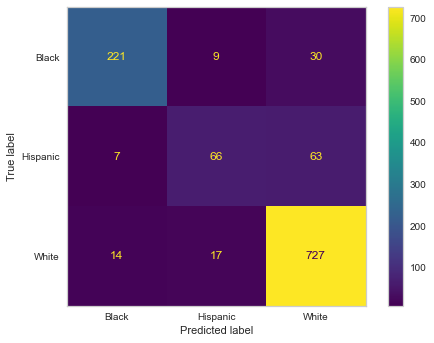

In [184]:
plot_confusion_matrix(xgb_model, X_test2, y_test2)
plt.grid(False);

In [185]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[221   9  30]
 [  7  66  63]
 [ 14  17 727]]
              precision    recall  f1-score   support

       Black       0.91      0.85      0.88       260
    Hispanic       0.72      0.49      0.58       136
       White       0.89      0.96      0.92       758

    accuracy                           0.88      1154
   macro avg       0.84      0.76      0.79      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [186]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, 
                        fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[17:07:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:07:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:07:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:07:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

test_f1_Hispanic          0.542
test_precision_Hispanic   0.704
test_recall_Hispanic      0.444
dtype: float64

### XGBoost Model GridsearchCV

In [200]:
param_grid = {"n_estimators":[100, 300],
              'max_depth':[3,5,6],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}

In [201]:
xgb_model = XGBClassifier(random_state=42)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2)

In [202]:
xgb_grid_model.fit(X_train2, y_train2,sample_weight=classes_weights)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

[18:04:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_est...
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     valid

In [203]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1}

In [204]:
xgb_grid_model.best_score_

0.6058103975535168

In [205]:
y_pred_xgb_grid = xgb_grid_model.predict(X_test2)

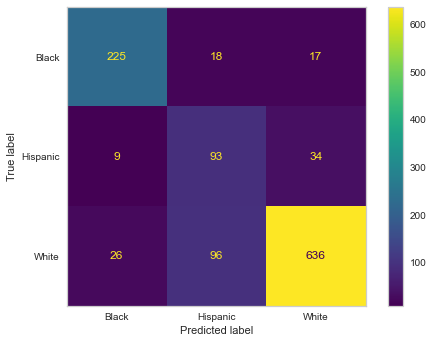

In [206]:
plot_confusion_matrix(xgb_grid_model, X_test2, y_test2)
plt.grid(False);

In [207]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[225  18  17]
 [  9  93  34]
 [ 26  96 636]]
              precision    recall  f1-score   support

       Black       0.87      0.87      0.87       260
    Hispanic       0.45      0.68      0.54       136
       White       0.93      0.84      0.88       758

    accuracy                           0.83      1154
   macro avg       0.75      0.80      0.76      1154
weighted avg       0.86      0.83      0.84      1154


Train_Set
[[ 977   27   34]
 [  22  461   60]
 [  96  330 2608]]
              precision    recall  f1-score   support

       Black       0.89      0.94      0.92      1038
    Hispanic       0.56      0.85      0.68       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



[18:09:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:09:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:09:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:41:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old b

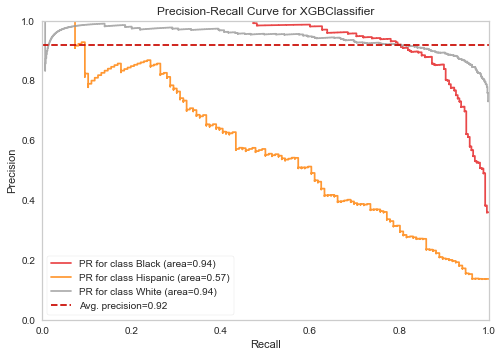

[17:41:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5; total time=   5.1s
[17:41:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   6.3s
[17:41:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END cols

[17:41:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5; total time=   5.1s
[17:41:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   6.3s
[17:41:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END cols

[17:41:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5; total time=   5.1s
[17:41:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5; total time=   6.5s
[17:41:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END co

In [208]:
model = XGBClassifier(random_state=42, learning_rate=0.1, max_depth=3, n_estimators=100,
                      colsample_bytree=0.5, subsample=1)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [209]:
y_pred = xgb_grid_model.predict(X_test2)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## Comparing Models

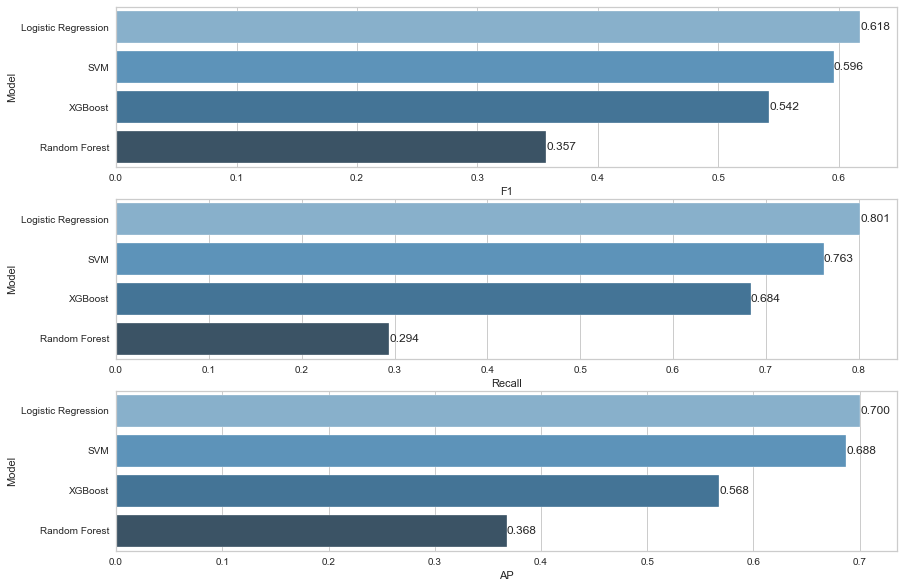

In [210]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

In [ ]:
# According to these results, I choose to continue with logistic regression.

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
# !pip install imblearn

In [230]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [221]:
over = SMOTE(sampling_strategy={"Hispanic": 1200})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

# We should not use SMOTE() with its default values.
# We should not use RandomUnderSampler() with its default values either.

In [222]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

# We should apply smote only to the training set.

In [250]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [224]:
y_resampled_over.value_counts()

White       3034
Hispanic    1200
Black       1038
Name: DODRace, dtype: int64

In [225]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [227]:
y_resampled_under.value_counts()

White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [231]:
# We are configuring our pipeline steps.
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to the steps that we created.
pipeline = imbpipeline(steps=steps)

# We will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [ ]:
# This pipeline is different that pipeline of scikit-learn 
# This is the pipeline of imblearn

In [232]:
y_resampled.value_counts()

White       2500
Hispanic    1200
Black       1038
Name: DODRace, dtype: int64

## SVC Over/Under Sampling

In [240]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("svc", SVC(C=3, class_weight="balanced", max_iter=10000, random_state=42))]

<IPython.core.display.Javascript object>

In [241]:
smote_pipeline = imbpipeline(steps=operations)

In [242]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1200})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('svc',
                 SVC(C=3, class_weight='balanced', max_iter=10000,
                     random_state=42))])

In [243]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[239  10  11]
 [ 10  95  31]
 [ 10  56 692]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92       260
    Hispanic       0.59      0.70      0.64       136
       White       0.94      0.91      0.93       758

    accuracy                           0.89      1154
   macro avg       0.82      0.84      0.83      1154
weighted avg       0.90      0.89      0.89      1154


Train_Set
[[ 983   20   35]
 [  28  402  113]
 [  53  219 2762]]
              precision    recall  f1-score   support

       Black       0.92      0.95      0.94      1038
    Hispanic       0.63      0.74      0.68       543
       White       0.95      0.91      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.83      0.87      0.85      4615
weighted avg       0.91      0.90      0.90      4615



In [244]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.600
test_precision_Hispanic   0.571
test_recall_Hispanic      0.635
dtype: float64

In [ ]:
# Smote does not do a good job when the target label values are so tangled within each other.

In [253]:
steps = [('o', over), ('u', under)]
pipeline = imbpipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [255]:
scaler = MinMaxScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

<IPython.core.display.Javascript object>

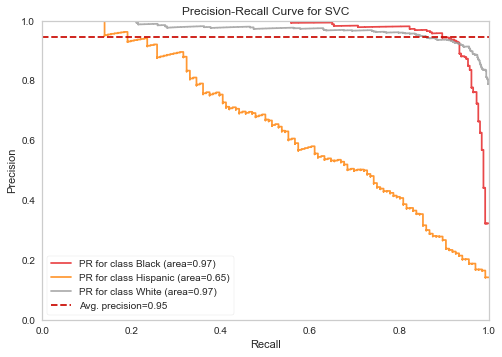

In [256]:
model = SVC(C=3, class_weight="balanced", max_iter=10000, random_state=42)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_resampled_scaled, y_resampled)
viz.score(X_test_scaled, y_test)
viz.show();

## Xgboost Over/ Under Sampling

In [259]:
operations = [('o', over), ('u', under), 
              ("xgb", XGBClassifier(colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100,
                          subsample=1, random_state=42))]

In [260]:
smote_pipeline = imbpipeline(steps=operations)

In [261]:
smote_pipeline.fit(X_train, y_train)

[22:26:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1200})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.5, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=42, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight

In [262]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[210  18  32]
 [  5  80  51]
 [  9  47 702]]
              precision    recall  f1-score   support

       Black       0.94      0.81      0.87       260
    Hispanic       0.55      0.59      0.57       136
       White       0.89      0.93      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.77      0.78      1154
weighted avg       0.86      0.86      0.86      1154


Train_Set
[[ 909   29  100]
 [  24  343  176]
 [  23  131 2880]]
              precision    recall  f1-score   support

       Black       0.95      0.88      0.91      1038
    Hispanic       0.68      0.63      0.66       543
       White       0.91      0.95      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.85      0.82      0.83      4615
weighted avg       0.89      0.90      0.89      4615



In [263]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[22:26:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:26:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:26:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:26:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

test_f1_Hispanic          0.506
test_precision_Hispanic   0.544
test_recall_Hispanic      0.475
dtype: float64

In [ ]:
# Smote did not do a good job with XGboost.

In [324]:
steps = [('o', over), ('u', under)]
pipeline = imbpipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

[22:59:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:59:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:59:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


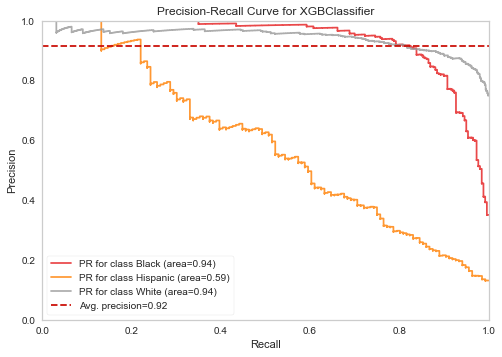

In [325]:
model = XGBClassifier(colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100,
                          subsample=1, random_state=42)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_resampled, y_resampled)
viz.score(X_test, y_test)
viz.show();

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [268]:
# We cannot use pipeline in Shap.
# Since we are going to examine feature importance in Shap, we have to do scaling.
# We don't have to do scaling in tree-based models, but we have to do scaling in gradient descent-based models like
# logistic regression.

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [269]:
# Since we are going to look for feature importance and do feature selection, we should use lasso.
# For lasso, we should either choose liblinear or saga.

model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=42, penalty="l1", solver='saga')
model_shap.fit(X_train_scaled, y_train)

# Saga generally gives us the best scores.

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=42, solver='saga')

In [270]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[239  12   9]
 [  7 103  26]
 [ 16  93 649]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.92       260
    Hispanic       0.50      0.76      0.60       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.84      0.80      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 969   38   31]
 [  18  452   73]
 [  77  350 2607]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1038
    Hispanic       0.54      0.83      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [272]:
import shap
explainer = shap.Explainer(model_shap,X_train_scaled)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test_scaled[start_index:end_index])

In [273]:
shap_values

[array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
          5.14815400e-01, -0.00000000e+00,  2.15963909e-01,
         -0.00000000e+00, -0.00000000e+00, -3.64152819e-01,
          8.36543595e-01, -0.00000000e+00, -0.00000000e+00,
         -2.35341419e-01,  3.55704791e-01,  2.03032490e-01,
         -0.00000000e+00, -1.91204423e-01, -2.52184259e-01,
         -1.84426097e-01, -4.54793144e-01, -0.00000000e+00,
         -0.00000000e+00,  5.22505945e-01,  2.52318608e-01,
          7.34090224e-01, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00,  1.90480681e-02, -0.00000000e+00,
          2.76272427e-01,  3.58745534e-01, -0.00000000e+00,
          4.51109303e-01, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -7.21530993e-01, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -2.71254794e-01,  2.23031558e-01,
          2.86249984e-03, -0.00000000e+00, -6.92656556e-01,
         -3.64662546e-01,  6.25961192e-0

In [275]:
shap_values[1][0]
# The effect of each feature on class 1 (hispanic)

array([-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  3.14662730e-01,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -5.83298622e-01,
       -0.00000000e+00, -8.77027587e-02, -4.40010984e-01, -0.00000000e+00,
       -0.00000000e+00,  7.75199733e-02, -0.00000000e+00, -0.00000000e+00,
        7.45419530e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.13663274e-02, -0.00000000e+00,
       -0.00000000e+00, -5.44718841e-02, -2.61142822e-01, -5.75981903e-02,
       -0.00000000e+00, -0.00000000e+00, -5.71797077e-01, -0.00000000e+00,
       -0.00000000e+00,  4.03533150e-01, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  8.56908703e-02, -0.00000000e+00,  4.49089425e-02,
       -0.00000000e+00,  0.00000000e+00,  6.09100334e-01, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [274]:
print(shap_values[0].shape)

(1, 232)


In [ ]:
# Red features refer to those that positively affect hispanic and blue features refer to those that negatively affect.

In [276]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model_shap.predict(X_test_scaled[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns) 

The log_model predicted: Black


In [277]:
explainer.expected_value[1]

1.7986272375924204

In [278]:
X_test_scaled[203]

array([0.08813559, 0.17132216, 0.23611111, 0.29268293, 0.18533605,
       0.2       , 0.35106383, 0.2752809 , 0.18320611, 0.19393939,
       0.18215613, 0.27777778, 0.42372881, 0.33103448, 0.16      ,
       0.23992995, 0.1878453 , 0.36363636, 0.3385214 , 0.35111111,
       0.34024896, 0.19245283, 0.14666667, 0.13307494, 0.20187793,
       0.25296443, 0.36104513, 0.33021807, 0.25777778, 0.3       ,
       0.28571429, 0.14285714, 0.26570048, 0.13095238, 0.30612245,
       0.24778761, 0.35443038, 0.171875  , 0.07960199, 0.40948276,
       0.32224532, 0.23684211, 0.30681818, 0.3452381 , 0.19565217,
       0.52631579, 0.26315789, 0.31654676, 0.325     , 0.25837321,
       0.228     , 0.29290618, 0.42307692, 0.40636042, 0.41841004,
       0.336     , 0.3463035 , 0.42975207, 0.19565217, 0.19127517,
       0.64912281, 0.16736402, 0.13580247, 0.22947761, 0.2826087 ,
       0.33181818, 0.46540881, 0.21338156, 0.17105263, 0.35897436,
       0.14285714, 0.31753555, 0.35117057, 0.34586466, 0.15722

In [279]:
shap.force_plot(explainer.expected_value[0],
                shap_values[0],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns) 

In [280]:
shap.force_plot(explainer.expected_value[2],
                shap_values[2],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns)

## Shap values for all data

In [281]:
# Which feature has how much effect on all observations
# The model that I am going to examine with Shap should be the best model for me. Since the best model that
# predicts Hispanic here is logistic regression, I should use logistic regression in Shap.

explainer = shap.Explainer(model_shap, X_train_scaled)

shap_values = explainer.shap_values(X_test_scaled)

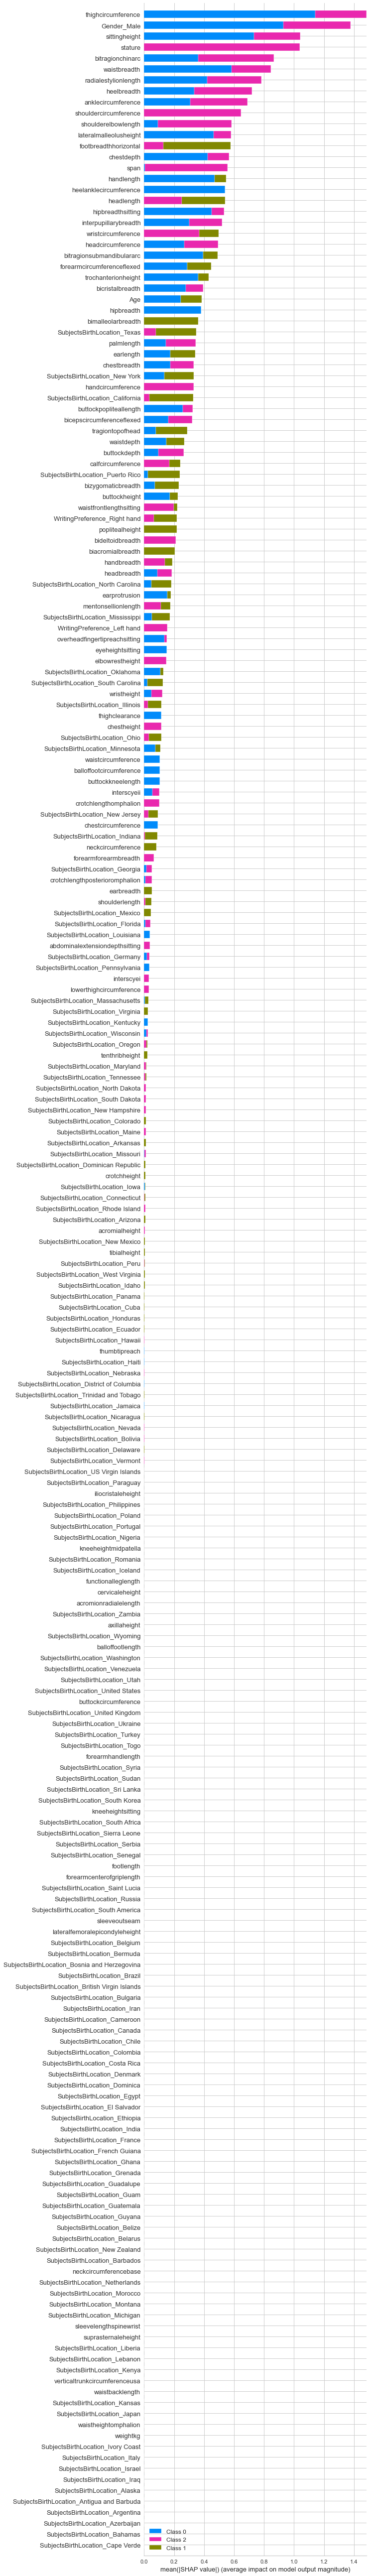

In [282]:
shap.summary_plot(shap_values, X_train_scaled, max_display=300,feature_names = X.columns)

In [283]:
hispanic = ["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 'tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight', "Age"]

In [284]:
X3 = df[hispanic]
X3 = pd.get_dummies(data=X3, drop_first=True)
y = df.DODRace

In [285]:
X3.shape

(5769, 154)

In [286]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=42, stratify=y)

In [287]:
from sklearn.pipeline import Pipeline

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                    random_state=42, penalty="l1", solver='saga'))]
pipe_shap_model = Pipeline(steps=operations)

# We have to choose l1 because we want to do feature selection.

<IPython.core.display.Javascript object>

In [288]:
pipe_shap_model.fit(X_train3, y_train3)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=42,
                                    solver='saga'))])

In [289]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[206  21  33]
 [ 11 102  23]
 [ 79 120 559]]
              precision    recall  f1-score   support

       Black       0.70      0.79      0.74       260
    Hispanic       0.42      0.75      0.54       136
       White       0.91      0.74      0.81       758

    accuracy                           0.75      1154
   macro avg       0.67      0.76      0.70      1154
weighted avg       0.80      0.75      0.77      1154


Train_Set
[[ 875   43  120]
 [  30  431   82]
 [ 391  500 2143]]
              precision    recall  f1-score   support

       Black       0.68      0.84      0.75      1038
    Hispanic       0.44      0.79      0.57       543
       White       0.91      0.71      0.80      3034

    accuracy                           0.75      4615
   macro avg       0.68      0.78      0.70      4615
weighted avg       0.80      0.75      0.76      4615



In [290]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.545
test_precision_Hispanic   0.429
test_recall_Hispanic      0.748
dtype: float64

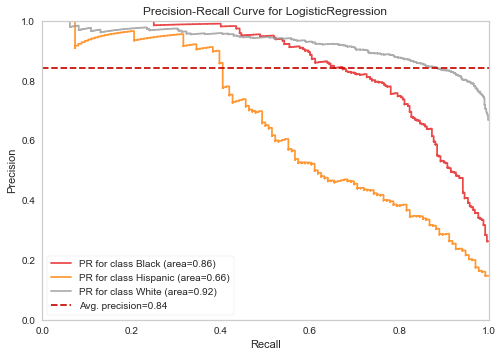

In [291]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train3, y_train3)
viz.score(X_test3, y_test3)
viz.show();

## SMOTE for X3 dataset

In [292]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]

<IPython.core.display.Javascript object>

In [293]:
smote_pipeline_2 = imbpipeline(steps=operations)

In [294]:
smote_pipeline_2.fit(X_train3, y_train3)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1200})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [295]:
eval_metric(smote_pipeline_2, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[207  21  32]
 [  9  91  36]
 [ 93  98 567]]
              precision    recall  f1-score   support

       Black       0.67      0.80      0.73       260
    Hispanic       0.43      0.67      0.53       136
       White       0.89      0.75      0.81       758

    accuracy                           0.75      1154
   macro avg       0.67      0.74      0.69      1154
weighted avg       0.79      0.75      0.76      1154


Train_Set
[[ 862   54  122]
 [  38  379  126]
 [ 411  375 2248]]
              precision    recall  f1-score   support

       Black       0.66      0.83      0.73      1038
    Hispanic       0.47      0.70      0.56       543
       White       0.90      0.74      0.81      3034

    accuracy                           0.76      4615
   macro avg       0.68      0.76      0.70      4615
weighted avg       0.80      0.76      0.77      4615



In [296]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.542
test_precision_Hispanic   0.453
test_recall_Hispanic      0.674
dtype: float64

## Find the best threshold for multiclassification

In [297]:
# We can look for the best threshold only with binary data.
# Here, we recode the target label such that there will be two labels, hispanics and others.

In [298]:
y2 = y.map({"Hispanic":1, "White":0, "Black":0})

In [299]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y2, test_size=0.2, random_state=42, stratify=y2)

In [300]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                     random_state=42))]
pipe_shap_model2 = Pipeline(steps=operations)

<IPython.core.display.Javascript object>

In [301]:
pipe_shap_model2.fit(X_train4, y_train4)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [302]:
eval_metric(pipe_shap_model2, X_train4, y_train4, X_test4, y_test4)

Test_Set
[[839 179]
 [ 24 112]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1018
           1       0.38      0.82      0.52       136

    accuracy                           0.82      1154
   macro avg       0.68      0.82      0.71      1154
weighted avg       0.90      0.82      0.85      1154


Train_Set
[[3373  699]
 [  85  458]]
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      4072
           1       0.40      0.84      0.54       543

    accuracy                           0.83      4615
   macro avg       0.69      0.84      0.72      4615
weighted avg       0.91      0.83      0.85      4615



<IPython.core.display.Javascript object>

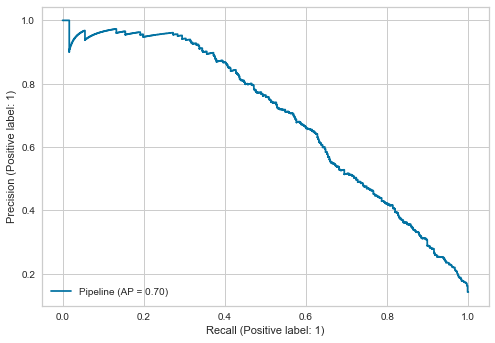

In [305]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(max_iter=10000,random_state=42))]
log_basic_model = Pipeline(steps=operations)

log_basic_model.fit(X_train4, y_train4)
plot_precision_recall_curve(log_basic_model, X_train4, y_train4);

In [306]:
y_pred_proba = log_basic_model.predict_proba(X_train4)
average_precision_score(y_train4, y_pred_proba[:,1])

0.6951170453715559

In [307]:
precisions, recalls, thresholds = precision_recall_curve(y_train4, y_pred_proba[:,1])

In [308]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.2947816807886396

In [309]:
y_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_test4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [310]:
print(confusion_matrix(y_test4,y_pred2))
print(classification_report(y_test4,y_pred2))

[[675 343]
 [ 11 125]]
              precision    recall  f1-score   support

           0       0.98      0.66      0.79      1018
           1       0.27      0.92      0.41       136

    accuracy                           0.69      1154
   macro avg       0.63      0.79      0.60      1154
weighted avg       0.90      0.69      0.75      1154



In [311]:
y_train_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_train4)[:,1]).apply(lambda x : 1 
                                                                               if x >= optimal_threshold else 0)
print(confusion_matrix(y_train4, y_train_pred2))
print(classification_report(y_train4, y_train_pred2))

[[2695 1377]
 [  29  514]]
              precision    recall  f1-score   support

           0       0.99      0.66      0.79      4072
           1       0.27      0.95      0.42       543

    accuracy                           0.70      4615
   macro avg       0.63      0.80      0.61      4615
weighted avg       0.90      0.70      0.75      4615



In [312]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [313]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',
                                                                     max_iter=10000,random_state=42))]
model = Pipeline(steps=operations)
CV(10, model, X_train4, y_train4, optimal_threshold)

<IPython.core.display.Javascript object>

Accuracy      68.24%  std 2.12%
Precision-1   25.73%  std 1.10%
Recall-1      89.67%  std 2.93%
F1_score-1    39.96%  std 1.35%


# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [314]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                     random_state=42))]
final_model = Pipeline(steps=operations)

<IPython.core.display.Javascript object>

In [315]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [316]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,...,SubjectsBirthLocation_Japan,SubjectsBirthLocation_Kansas,SubjectsBirthLocation_Kentucky,SubjectsBirthLocation_Kenya,SubjectsBirthLocation_Lebanon,SubjectsBirthLocation_Liberia,SubjectsBirthLocation_Louisiana,SubjectsBirthLocation_Maine,SubjectsBirthLocation_Maryland,SubjectsBirthLocation_Massachusetts,SubjectsBirthLocation_Mexico,SubjectsBirthLocation_Michigan,SubjectsBirthLocation_Minnesota,SubjectsBirthLocation_Mississippi,SubjectsBirthLocation_Missouri,SubjectsBirthLocation_Montana,SubjectsBirthLocation_Morocco,SubjectsBirthLocation_Nebraska,SubjectsBirthLocation_Netherlands,SubjectsBirthLocation_Nevada,SubjectsBirthLocation_New Hampshire,SubjectsBirthLocation_New Jersey,SubjectsBirthLocation_New Mexico,SubjectsBirthLocation_New York,SubjectsBirthLocation_New Zealand,SubjectsBirthLocation_Nicaragua,SubjectsBirthLocation_Nigeria,SubjectsBirthLocation_North Carolina,SubjectsBirthLocation_North Dakota,SubjectsBirthLocation_Ohio,SubjectsBirthLocation_Oklahoma,SubjectsBirthLocation_Oregon,SubjectsBirthLocation_Panama,SubjectsBirthLocation_Paraguay,SubjectsBirthLocation_Pennsylvania,SubjectsBirthLocation_Peru,SubjectsBirthLocation_Philippines,SubjectsBirthLocation_Poland,SubjectsBirthLocation_Portugal,SubjectsBirthLocation_Puerto Rico,SubjectsBirthLocation_Rhode Island,SubjectsBirthLocation_Romania,SubjectsBirthLocation_Russia,SubjectsBirthLocation_Saint Lucia,SubjectsBirthLocation_Senegal,SubjectsBirthLocation_Serbia,SubjectsBirthLocation_Sierra Leone,SubjectsBirthLocation_South Africa,SubjectsBirthLocation_South America,SubjectsBirthLocation_South Carolina,SubjectsBirthLocation_South Dakota,SubjectsBirthLocation_South Korea,SubjectsBirthLocation_Sri Lanka,SubjectsBirthLocation_Sudan,SubjectsBirthLocation_Syria,SubjectsBirthLocation_Tennessee,SubjectsBirthLocation_Texas,SubjectsBirthLocation_Togo,SubjectsBirthLocation_Trinidad and Tobago,SubjectsBirthLocation_Turkey,SubjectsBirthLocation_US Virgin Islands,SubjectsBirthLocation_Ukraine,SubjectsBirthLocation_United Kingdom,SubjectsBirthLocation_United States,SubjectsBirthLocation_Utah,SubjectsBirthLocation_Venezuela,SubjectsBirthLocation_Vermont,SubjectsBirthLocation_Virginia,SubjectsBirthLocation_Washington,SubjectsBirthLocation_West Virginia,SubjectsBirthLocation_Wisconsin,SubjectsBirthLocation_Wyoming,SubjectsBirthLocation_Zambia,WritingPreference_Left hand,WritingPreference_Right hand
count,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.00

In [317]:
mean_human = X.describe().loc["mean"]
mean_human

abdominalextensiondepthsitting                  247.254
acromialheight                                 1408.630
acromionradialelength                           328.072
anklecircumference                              225.202
axillaheight                                   1301.903
balloffootcircumference                         244.408
balloffootlength                                195.119
biacromialbreadth                               399.706
bicepscircumferenceflexed                       341.663
bicristalbreadth                                274.903
bideltoidbreadth                                491.455
bimalleolarbreadth                               72.335
bitragionchinarc                                324.962
bitragionsubmandibulararc                       306.678
bizygomaticbreadth                              139.529
buttockcircumference                           1022.059
buttockdepth                                    242.234
buttockheight                                   

In [318]:
final_model.predict(X.loc[[201]])

array(['White'], dtype=object)

In [319]:
y[201]

'White'

In [320]:
final_model.predict([mean_human])

array(['White'], dtype=object)

In [321]:
# an average human is white

In [322]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

# This score gives a general performance score of the model.
# It is generally used with unbalanced datasets.

0.7895083688635766

In [323]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7808571214712837

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___